# 0 Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Wed Nov 23 08:23:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+------

In [2]:
PROJECT_path = '/content/drive/MyDrive/IDB_diamond_damage'

In [3]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image

In [4]:
def load_dataset(dataset_path):
  image_list = []
  label_list = []
  class_list = []
  image_num = 0
  tag = 0
  n = 0
  category_names = os.listdir(dataset_path)
  category_num = len(category_names)
  category_names.sort()
  for category in category_names:
    n += 1
    if n<10:
      class_n = "(0"+str(n)+")"
    else:
      class_n = "("+str(n)+")"
    class_list.append(class_n)
    category_path = os.path.join(dataset_path, category)
    file_names = os.listdir(category_path)
    file_nums = len(file_names)
    file_names.sort()
    print("class No. "+class_n+"; category: "+str(category)+"; image num: ", file_nums, end=" ")
    image_num += file_nums
    for file in tqdm(file_names):
      file_path = os.path.join(category_path, file)
      image = Image.open(file_path)
      img = np.asarray(image,dtype="float32")

      #chose wheather to crop the images, e.g., 1024*1024
      img = img[0:1024, 0:1024]
      
      img = img[:, :, np.newaxis] 
      image_list.append(img)
      label_list.append(tag)
    tag += 1
  return image_list, label_list, category_num, class_list, image_num

In [5]:
X_set, Y_set, CLASS_num, CLASS_list, IMG_num = load_dataset(os.path.join(PROJECT_path, 'SEM'))
print("\n")
print("Damage class num = ", CLASS_num)
print("Damage class list: ", CLASS_list)
print("SEM image num = ", IMG_num)

class No. (01); category: 01_25.30_2280_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 138.14it/s]


class No. (02); category: 02_30.35_2280_original; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 158.62it/s]


class No. (03); category: 03_35.40_2280_original; image num:  45 

100%|██████████| 45/45 [00:00<00:00, 158.42it/s]


class No. (04); category: 04_40.45_2180_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 163.80it/s]


class No. (05); category: 05_45.50_2190_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 172.33it/s]


class No. (06); category: 06_25.30_2280+Ti_original; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 170.79it/s]


class No. (07); category: 07_30.35_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 148.24it/s]


class No. (08); category: 08_35.40_2280+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 164.84it/s]


class No. (09); category: 09_40.45_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 166.22it/s]


class No. (10); category: 10_45.50_2180+Ti_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 174.56it/s]


class No. (11); category: 11_40.50_ISD1750_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 165.17it/s]


class No. (12); category: 12_40.50_JS1100_original; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 169.76it/s]


class No. (13); category: 13_50.60_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 144.67it/s]


class No. (14); category: 14_60.70_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 110.79it/s]


class No. (15); category: 15_70.80_JS1100_original; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 105.42it/s]


class No. (16); category: 16_25.30_2280_heating; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 141.05it/s]


class No. (17); category: 17_30.35_2280_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 173.84it/s]


class No. (18); category: 18_35.40_2280_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 182.55it/s]


class No. (19); category: 19_40.45_2180_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 187.49it/s]


class No. (20); category: 20_45.50_2190_heating; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 177.81it/s]


class No. (21); category: 21_25.30_2280+Ti_heating; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 165.17it/s]


class No. (22); category: 22_30.35_2280+Ti_heating; image num:  48 

100%|██████████| 48/48 [00:00<00:00, 144.20it/s]


class No. (23); category: 23_35.40_2280+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 131.92it/s]


class No. (24); category: 24_40.45_2180+Ti_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 140.80it/s]


class No. (25); category: 25_45.50_2180+Ti_heating; image num:  43 

100%|██████████| 43/43 [00:00<00:00, 138.11it/s]


class No. (26); category: 26_40.50_ISD1750_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 148.74it/s]


class No. (27); category: 27_40.50_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 144.63it/s]


class No. (28); category: 28_50.60_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 129.70it/s]


class No. (29); category: 29_60.70_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 132.57it/s]


class No. (30); category: 30_70.80_JS1100_heating; image num:  42 

100%|██████████| 42/42 [00:00<00:00, 124.09it/s]


class No. (31); category: 31_25.30_2280_sintering; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 129.70it/s]


class No. (32); category: 32_30.35_2280_sintering; image num:  44 

100%|██████████| 44/44 [00:00<00:00, 142.59it/s]


class No. (33); category: 33_35.40_2280_sintering; image num:  41 

100%|██████████| 41/41 [00:00<00:00, 113.78it/s]


class No. (34); category: 34_40.45_2180_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 128.43it/s]


class No. (35); category: 35_40.45_2190_sintering; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 141.97it/s]


class No. (36); category: 36_50.60_JS1100_20200701T.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 135.16it/s]


class No. (37); category: 37_50.60_JS1100_20200701T.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 126.28it/s]


class No. (38); category: 38_50.60_JS1100_20200701T.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 130.39it/s]


class No. (39); category: 39_50.60_JS1100_20200710T1.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 98.91it/s] 


class No. (40); category: 40_50.60_JS1100_20200710T1.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 96.04it/s]


class No. (41); category: 41_50.60_JS1100_20200710T1.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 94.38it/s]


class No. (42); category: 42_50.60_JS1100_20200710T2.1; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 81.88it/s]


class No. (43); category: 43_50.60_JS1100_20200710T2.2; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 95.90it/s]


class No. (44); category: 44_50.60_JS1100_20200710T2.3; image num:  40 

100%|██████████| 40/40 [00:00<00:00, 87.83it/s]


class No. (45); category: 45_50.60_JS1100_20200713T0.1; image num:  88 

100%|██████████| 88/88 [00:01<00:00, 84.67it/s]


class No. (46); category: 46_50.60_JS1100_20200713T0.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 90.74it/s]


class No. (47); category: 47_50.60_JS1100_20200713T0.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 96.04it/s]


class No. (48); category: 48_50.60_JS1100_20200713T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 95.32it/s]


class No. (49); category: 49_50.60_JS1100_20200713T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 82.52it/s]


class No. (50); category: 50_50.60_JS1100_20200713T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 112.95it/s]


class No. (51); category: 51_50.60_JS1100_20200713T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 119.00it/s]


class No. (52); category: 52_50.60_JS1100_20200713T2.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 143.55it/s]


class No. (53); category: 53_50.60_JS1100_20200713T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 186.25it/s]


class No. (54); category: 54_50.60_JS1100_20200713T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 180.79it/s]


class No. (55); category: 55_50.60_JS1100_20200713T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 175.01it/s]


class No. (56); category: 56_50.60_JS1100_20200713T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 187.51it/s]


class No. (57); category: 57_50.60_JS1100_20200714T1.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 178.54it/s]


class No. (58); category: 58_50.60_JS1100_20200714T1.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 189.10it/s]


class No. (59); category: 59_50.60_JS1100_20200714T1.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 189.89it/s]


class No. (60); category: 60_50.60_JS1100_20200714T2.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 202.85it/s]


class No. (61); category: 61_50.60_JS1100_20200714T2.2; image num:  47 

100%|██████████| 47/47 [00:00<00:00, 205.17it/s]


class No. (62); category: 62_50.60_JS1100_20200714T2.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 199.22it/s]


class No. (63); category: 63_50.60_JS1100_20200714T3.1; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 195.12it/s]


class No. (64); category: 64_50.60_JS1100_20200714T3.2; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 192.51it/s]


class No. (65); category: 65_50.60_JS1100_20200714T3.3; image num:  46 

100%|██████████| 46/46 [00:00<00:00, 190.86it/s]



Damage class num =  65
Damage class list:  ['(01)', '(02)', '(03)', '(04)', '(05)', '(06)', '(07)', '(08)', '(09)', '(10)', '(11)', '(12)', '(13)', '(14)', '(15)', '(16)', '(17)', '(18)', '(19)', '(20)', '(21)', '(22)', '(23)', '(24)', '(25)', '(26)', '(27)', '(28)', '(29)', '(30)', '(31)', '(32)', '(33)', '(34)', '(35)', '(36)', '(37)', '(38)', '(39)', '(40)', '(41)', '(42)', '(43)', '(44)', '(45)', '(46)', '(47)', '(48)', '(49)', '(50)', '(51)', '(52)', '(53)', '(54)', '(55)', '(56)', '(57)', '(58)', '(59)', '(60)', '(61)', '(62)', '(63)', '(64)', '(65)']
SEM image num =  2870


In [6]:
# (01)~(65)
toughness_index = [76.53,	82.50,	92.38,	88.75,	92.30,	81.10,	78.98,	92.48,	89.30,	86.55,	86.23,	92.05,	86.73,	77.00,	76.18,	74.20,	80.38,	91.38,	89.20,	88.08,	78.25,	77.85,	89.45,	82.55,	87.55,	83.63,	87.60,	85.75,	77.18,	75.08,	72.30,	75.28,	83.53,	84.80,	87.78,	80.50,	63.73,	74.88,	75.05,	74.65,	73.98,	79.50,	78.75,	77.45,	79.03,	78.03,	75.25,	72.28,	71.70,	74.98,	77.85,	76.28,	77.75,	75.53,	75.70,	74.85,	80.73,	80.38,	78.85,	81.58,	81.00,	80.65,	82.13,	80.20,	79.15]

# (31)~(65)
relative_density = [108.60,	108.60,	108.60,	108.60,	108.60,	99.66,	94.54,	95.44,	93.71,	87.58,	93.59,	94.62,	90.36,	95.28,	84.82,	89.01,	90.81,	87.69,	88.38,	88.35,	88.07,	90.25,	93.89,	89.23,	92.19,	91.32,	93.84,	94.93,	91.42,	98.09,	96.85,	96.80,	98.00,	96.16,	95.25]
rockwell_hardness = [98.06,	98.06,	98.06,	98.06,	98.06,	96.45,	95.35,	95.30,	104.45,	106.45,	103.50,	100.80,	101.80,	98.80,	97.60,	97.05,	96.90,	98.20,	94.70,	91.50,	99.50,	99.40,	96.45,	99.50,	101.25,	96.10,	95.60,	108.95,	110.70,	96.55,	110.55,	111.75,	92.55,	106.50,	105.10]
bending_strength_loss = [49.32,	53.93,	52.30,	48.24,	48.24,	45.21,	33.43,	33.92,	67.04,	62.50,	73.50,	69.87,	58.25,	73.44,	65.95,	60.14,	65.94,	67.34,	48.74,	55.50,	63.42,	61.80,	61.30,	67.09,	72.16,	65.99,	44.50,	62.41,	62.38,	41.59,	64.31,	64.75,	47.22,	67.64,	69.57]

VALUE = toughness_index

In [7]:
# Normal distribution on Y_set,  mean, std, num
mean_value_list = VALUE
def setting_values(row):
  value = sorted(np.random.normal(mean_value_list[int(row)], 3, size=1))[0]
  return np.round(value, 2)

In [8]:
if not VALUE == toughness_index:
  X_set = X_set[1290:]
  Y_set = Y_set[1290:]

In [9]:
save_dir = os.path.join(PROJECT_path, 'saved_models_regression')
if not os.path.isdir(save_dir):
  os.makedirs(save_dir)

# 1 Dataset processing

In [10]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
def regression_dataset_processX(X_set):
  
  # choose the size to convert, e.g., 224*224
  X_set = [cv2.cvtColor(cv2.resize(i, (224, 224)), cv2.COLOR_GRAY2RGB) for i in X_set]

  X_set = np.asarray(X_set)
  X_set = X_set.astype('float32')
  X_set /= 255.0 

  return X_set

In [12]:
X_set = regression_dataset_processX(X_set)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_set, Y_set, test_size = 0.25, random_state = 888)

In [14]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_test)

(2152, 224, 224, 3)
[55, 38, 7, 45, 4, 57, 40, 52, 19, 47, 58, 31, 0, 35, 49, 57, 61, 60, 57, 20, 20, 18, 64, 20, 6, 38, 62, 6, 1, 48, 44, 44, 25, 45, 22, 31, 30, 25, 26, 12, 48, 32, 35, 49, 35, 25, 55, 13, 48, 34, 44, 19, 43, 21, 61, 23, 28, 55, 9, 29, 28, 19, 48, 51, 18, 26, 49, 40, 23, 32, 43, 5, 50, 42, 2, 12, 58, 5, 21, 18, 39, 29, 24, 42, 36, 1, 44, 60, 35, 17, 60, 44, 53, 33, 17, 44, 49, 47, 1, 16, 6, 24, 21, 46, 55, 28, 27, 42, 1, 54, 0, 36, 16, 15, 24, 23, 21, 5, 63, 15, 11, 62, 39, 51, 47, 54, 49, 64, 9, 32, 6, 53, 20, 3, 62, 11, 8, 51, 47, 41, 9, 6, 48, 59, 56, 51, 22, 9, 27, 10, 60, 48, 26, 8, 56, 17, 46, 12, 46, 11, 31, 10, 21, 64, 51, 24, 37, 17, 2, 19, 11, 11, 5, 61, 2, 51, 55, 23, 5, 54, 37, 28, 56, 58, 57, 31, 54, 23, 16, 32, 26, 4, 31, 41, 39, 63, 48, 3, 50, 43, 11, 52, 61, 27, 24, 46, 53, 24, 16, 0, 43, 34, 14, 0, 21, 43, 5, 57, 22, 57, 10, 44, 4, 47, 48, 18, 53, 15, 40, 36, 58, 17, 58, 22, 59, 3, 55, 5, 53, 53, 13, 12, 63, 11, 53, 6, 30, 35, 40, 15, 44, 57, 33, 44, 

In [15]:
def regression_dataset_processY(Y_set):
  
  Y_set_pd = pd.DataFrame(Y_set)
  Y_set_pd.columns = ['label']
  Y_set_pd['value'] = Y_set_pd['label'].apply(setting_values)

  return Y_set_pd

In [16]:
Y_train_pd = regression_dataset_processY(Y_train)
Y_test_pd = regression_dataset_processY(Y_test)

In [17]:
print(X_set.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train_pd)
print(Y_test_pd)

(2870, 224, 224, 3)
(2152, 224, 224, 3)
(718, 224, 224, 3)
      label  value
0        55  75.01
1        38  75.89
2         7  94.31
3        45  80.74
4         4  94.11
...     ...    ...
2147     27  84.05
2148     29  71.09
2149     57  82.62
2150     44  81.71
2151     58  78.16

[2152 rows x 2 columns]
     label  value
0       64  78.94
1       42  73.20
2       40  73.02
3        9  89.63
4       25  81.68
..     ...    ...
713      6  78.90
714     64  78.90
715      8  86.24
716     29  73.75
717     52  78.20

[718 rows x 2 columns]


In [18]:
min_max_scaler = MinMaxScaler()

min_max_scaler.fit(Y_train_pd)
Y_train = min_max_scaler.transform(Y_train_pd)[:, 1]

min_max_scaler.fit(Y_test_pd)
Y_test = min_max_scaler.transform(Y_test_pd)[:, 1]
Y_test_label = min_max_scaler.transform(Y_test_pd)[:, 0]

In [19]:
print(len(Y_train))
print(Y_train)
print('-------------------')
print(len(Y_test))
print(Y_test)

2152
[0.41040462 0.43159923 0.87524085 ... 0.59368979 0.57177264 0.48627168]
-------------------
718
[0.47984645 0.34213052 0.3378119  0.73632438 0.54558541 0.52255278
 0.49736084 0.70153551 0.47480806 0.37404031 0.56909789 0.47816699
 0.57821497 0.43474088 0.43258157 0.57845489 0.73632438 0.55998081
 0.3450096  0.76367562 0.55230326 0.60004798 0.26295585 0.42466411
 0.37883877 0.88651631 0.50335893 0.63147793 0.60388676 0.56166027
 0.65571017 0.48224568 0.57797505 0.35196737 0.40547025 0.45729367
 0.49544146 0.59884837 0.49712092 0.48008637 0.71233205 0.50839731
 0.58517274 0.61012476 0.34261036 0.4184261  0.40043186 0.39395393
 0.36660269 0.45729367 0.5        0.83253359 0.34548944 0.69793666
 0.39923225 0.2831094  0.36684261 0.49520154 0.81933781 0.45513436
 0.12571977 0.45009597 0.67202495 0.50863724 0.55758157 0.59237044
 0.66674664 0.4153071  0.57821497 0.46569098 0.34309021 0.45825336
 0.56573896 0.53382917 0.60988484 0.41098848 0.42634357 0.53646833
 0.37523992 0.77111324 0.527

# 2 VGG16 regression model

## 2.1 [A] model establishment - DIY

In [20]:
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
# from keras.models import Sequential, Model

In [21]:
# model = Sequential()

# # Block_1
# model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=X_train.shape[1:]))
# model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_2
# model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_3
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_4
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_5
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# # Block_6
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(1, activation='linear'))

## 2.1 [B] Model establishment - Import

In [22]:
from keras import applications
from keras.layers import Flatten, Dense, Dropout, Activation
from keras.models import Sequential, Model

In [23]:
base_model = applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=X_train.shape[1:])
model = Sequential()
print(base_model.output)
model.add(Flatten(input_shape=base_model.output_shape[1:]))

# add the rest layers
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))
model=Model(inputs=base_model.input, outputs=model(base_model.output))

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [24]:
# whether or not apply Fine-tunning
fine_tuning = True
if fine_tuning:
  for layer in base_model.layers:
    layer.trainable = False

## 2.2 Model compiling

In [25]:
import keras
from keras.models import Model

In [26]:
# choose approriate optimizer, loss function
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


## 2.3 Model training



In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [28]:
# set hyper-parameters
epochs = 20
batch_size = 5

# whether or not apply early stopping
early_stopping = False
if early_stopping:
  callbacks = [EarlyStopping(monitor='val_loss', patience=3)]
else:
  callbacks = None

# whether or not apply data augmentation 
data_augmentation = True

In [29]:
if not data_augmentation:
  print('Not using data augmentation.')
  history = model.fit(X_train, Y_train, 
                      batch_size=batch_size, 
                      epochs=epochs, 
                      validation_data=(X_test, Y_test), 
                      shuffle=True, 
                      callbacks=callbacks)
else:
  print('Using real-time data augmentation.')
  datagen = ImageDataGenerator(featurewise_center=False,  
                               samplewise_center=False,  
                               featurewise_std_normalization=False,  
                               samplewise_std_normalization=False, 
                               zca_whitening=False, 
                               zca_epsilon=1e-06, 
                               rotation_range=0, 
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0., 
                               zoom_range=[0.8,1.2],
                               channel_shift_range=0., 
                               fill_mode='nearest',
                               cval=0., 
                               horizontal_flip=True, 
                               vertical_flip=True, 
                               rescale=None,
                               preprocessing_function=None,
                               data_format=None,
                               validation_split=0.0)
  datagen.fit(X_train)
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),  
                                epochs=epochs, 
                                steps_per_epoch=X_train.shape[0]//batch_size, 
                                validation_data=(X_test, Y_test), 
                                workers=10,
                                callbacks=callbacks)

Using real-time data augmentation.
Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


430/430 [==============================] - 34s 60ms/step - loss: 0.2875 - val_loss: 0.0333
Epoch 2/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0592 - val_loss: 0.0309
Epoch 3/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0411 - val_loss: 0.0390
Epoch 4/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0315 - val_loss: 0.0259
Epoch 5/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0266 - val_loss: 0.0538
Epoch 6/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0249 - val_loss: 0.0183
Epoch 7/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0239 - val_loss: 0.0189
Epoch 8/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0227 - val_loss: 0.0182
Epoch 9/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0206 - val_loss: 0.0179
Epoch 10/20
430/430 [==============================] - 21s 49ms/step - loss: 0.0212 - val_los

## 2.4 Model preservation

In [30]:
import os
from keras.models import Model

In [31]:
model_path = os.path.join(save_dir, "regression_model.h5")
model.save(model_path)
model.summary()
print('Regression model saved at %s ' % model_path)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 2.5 Training curves

In [32]:
import os
import matplotlib.pyplot as plt

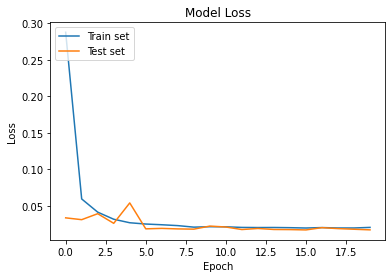

In [33]:
# Plot Loss-Epoch_default
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Test set'], loc='upper left')
plt.savefig(os.path.join(save_dir, 'model_loss_default.png'))
plt.show()

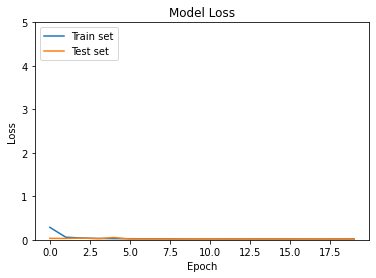

In [34]:
# Plot Loss-Epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train set', 'Test set'], loc='upper left')
plt.ylim(0,5)
plt.savefig(os.path.join(save_dir, 'model_loss.png'))
plt.show()

## 2.6 Model prediction

In [35]:
from keras.models import Model

In [36]:
Y_test_pred = model.predict(X_test)

23/23 [==============================] - 4s 152ms/step


In [37]:
min_max_scaler.fit(Y_test_pd)

Y_test_pred_pd = pd.DataFrame({'label':list(Y_test_label), 'value':list(Y_test_pred)})
Y_test_pred = min_max_scaler.inverse_transform(Y_test_pred_pd)

Y_test_pred_pd2 = pd.DataFrame(Y_test_pred)
Y_test_pred_pd2.columns = ['label','value']

Y_test_pd['label_pred'] = pd.DataFrame(Y_test_pred_pd2['label'])
Y_test_pd['value_pred'] = pd.DataFrame(Y_test_pred_pd2['value'])

Y_test_pd.to_csv(os.path.join(save_dir, 'regression_prediction_test.csv'))

print(Y_test_pd.head(20))

    label  value  label_pred  value_pred
0      64  78.94        64.0   78.017956
1      42  73.20        42.0   76.248014
2      40  73.02        40.0   78.694360
3       9  89.63         9.0   85.700181
4      25  81.68        25.0   84.297518
5      21  80.72        21.0   83.132262
6      10  79.67        10.0   84.584842
7      27  88.18        27.0   83.598400
8      64  78.73        64.0   77.211452
9      14  74.53        14.0   83.338247
10     50  82.66        50.0   79.331087
11     31  78.87        31.0   82.018898
12      1  83.04         1.0   86.354509
13     61  77.06        61.0   80.709310
14     44  76.97        44.0   77.757525
15     12  83.05        12.0   85.862904
16      8  89.63         8.0   86.298564
17     45  82.28        45.0   79.191606
18     14  73.32        14.0   82.084559
19     11  90.77        11.0   87.101830


## 2.7 Feature maps

In [38]:
import os
import keras
import numpy as np

In [39]:
visual_folder = os.path.join(save_dir, "regression_model_visual")
visual_plot_folder = os.path.join(save_dir, "regression_model_visual_plot")

if not os.path.isdir(visual_folder):
  os.makedirs(visual_folder)

if not os.path.isdir(visual_plot_folder):
  os.makedirs(visual_plot_folder)

In [40]:
def visual(model, data, num_layer):
  data = np.expand_dims(data, axis=0) 
  layer = keras.backend.function([model.layers[0].input], [model.layers[num_layer].output])
  f1 = layer([data])[0]
  num = f1.shape[-1]
  plt.figure(figsize=(8, 8))
  print("saving images in layer_"+str(num_layer)+" ...")
  for i in range(num):
    plt.subplot(np.ceil(np.sqrt(num)), np.ceil(np.sqrt(num)), i+1)
    layer_img = f1[0, :, :, i] * 255
    plt.imshow(layer_img, cmap='gray')
    plt.axis('off')
    visual_single_name = "layer_"+str(num_layer)+"_img_"+str(i)+".png"
    layer_single_path = os.path.join(visual_folder, visual_single_name)
    cv2.imwrite(layer_single_path, layer_img)
  layer_all_name = "layer_"+str(num_layer)+".png"
  layer_all_path = os.path.join(visual_plot_folder, layer_all_name)
  plt.savefig(layer_all_path, dpi=350)
  plt.show()

saving images in layer_0 ...


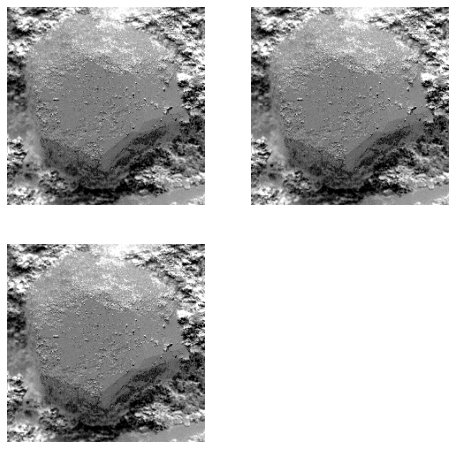

saving images in layer_1 ...


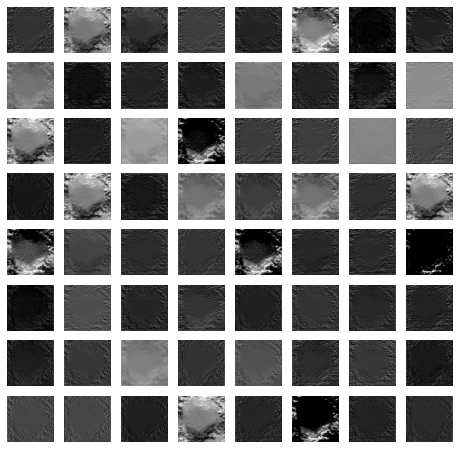

saving images in layer_2 ...


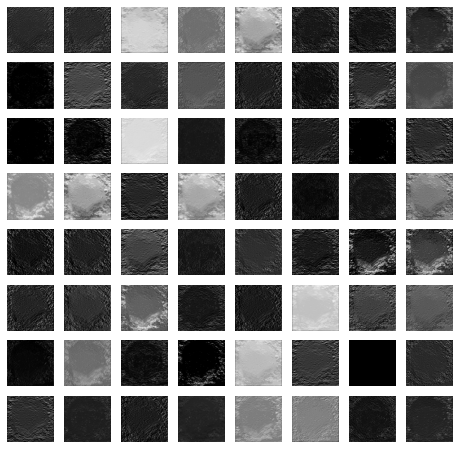

saving images in layer_3 ...


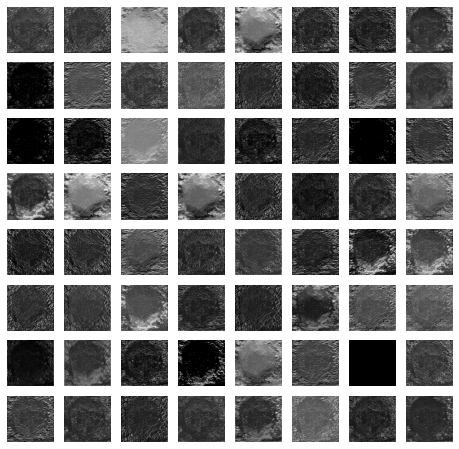

saving images in layer_4 ...


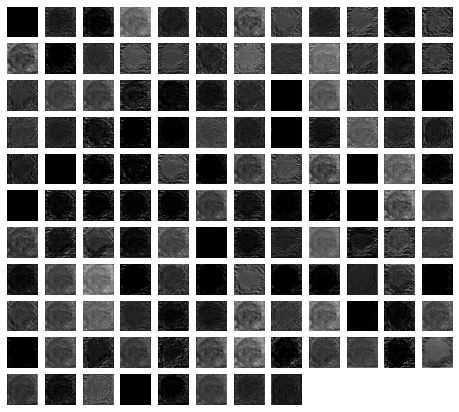

saving images in layer_5 ...


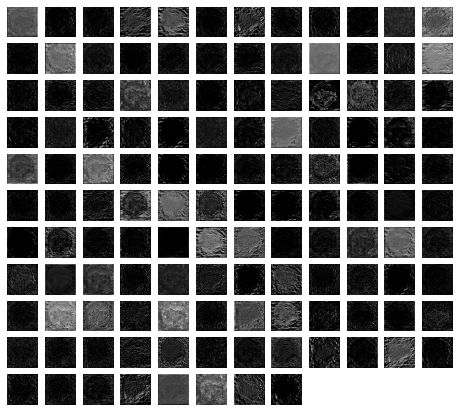

saving images in layer_6 ...


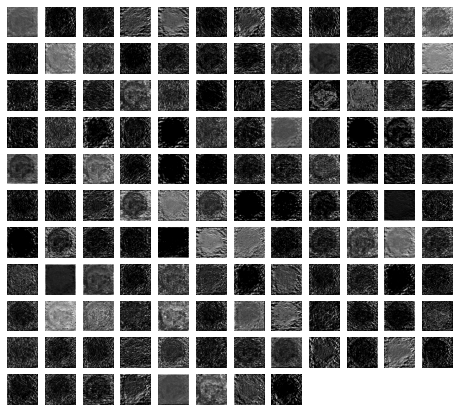

saving images in layer_7 ...


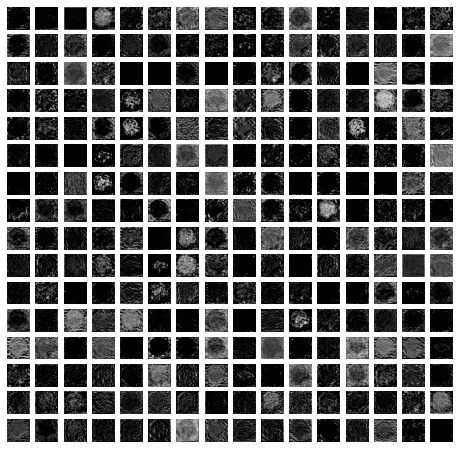

saving images in layer_8 ...


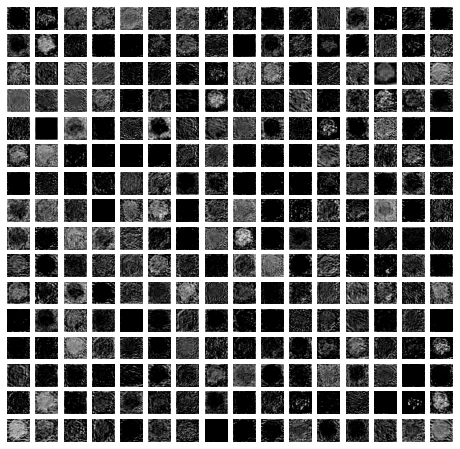

saving images in layer_9 ...


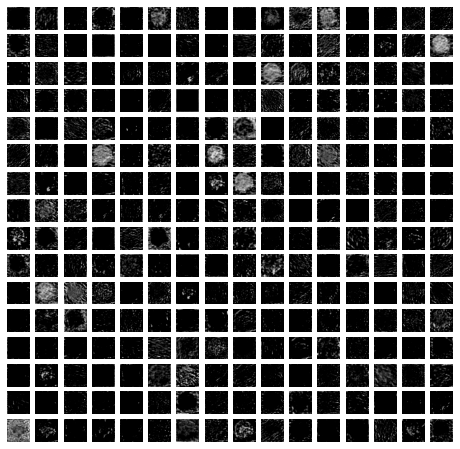

saving images in layer_10 ...


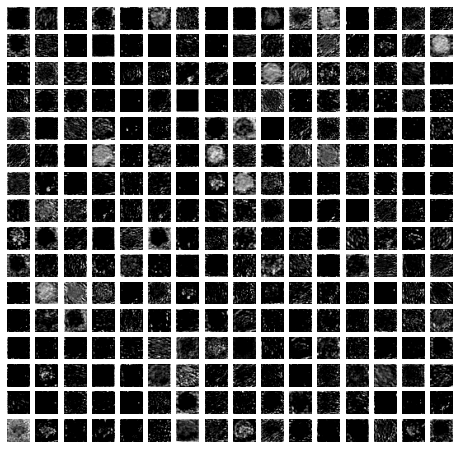

saving images in layer_11 ...


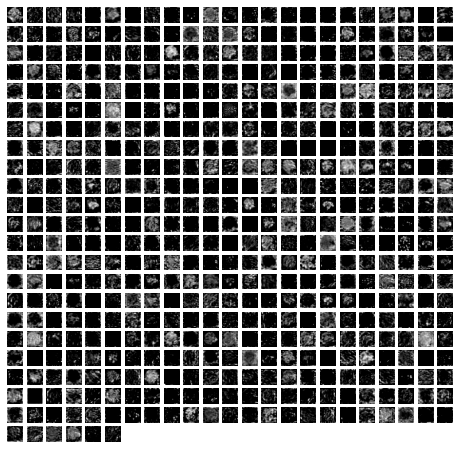

saving images in layer_12 ...


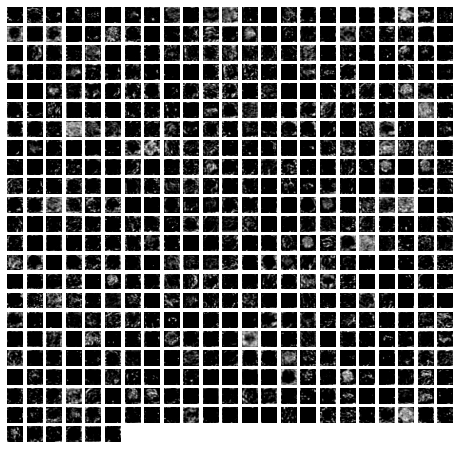

saving images in layer_13 ...


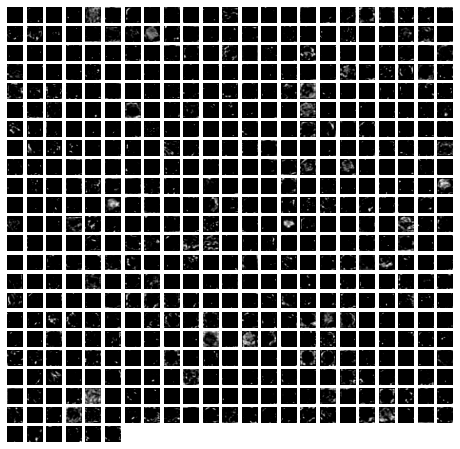

saving images in layer_14 ...


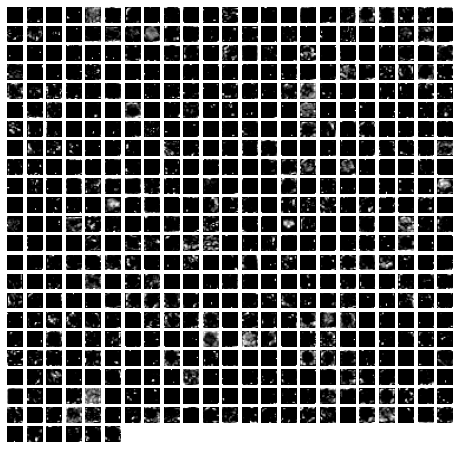

saving images in layer_15 ...


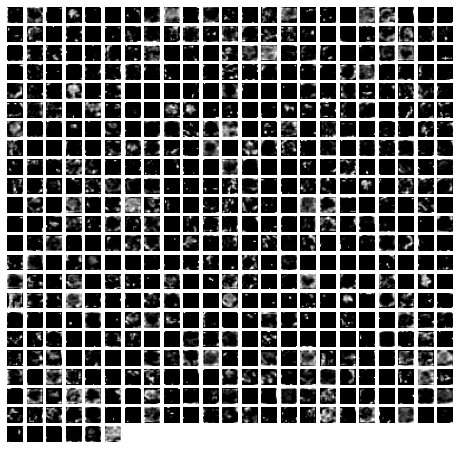

saving images in layer_16 ...


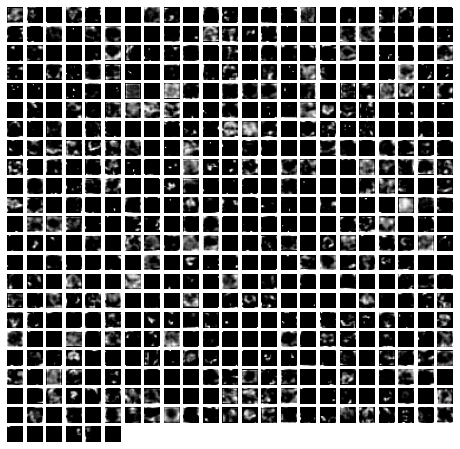

saving images in layer_17 ...


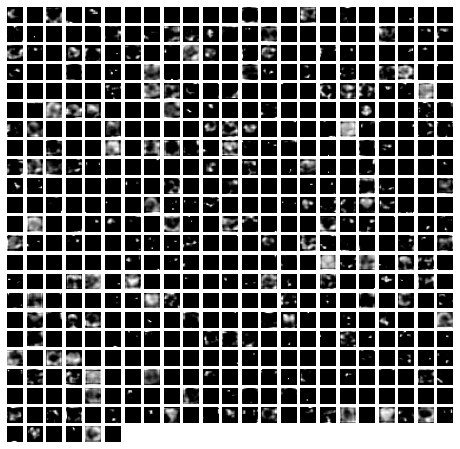

saving images in layer_18 ...


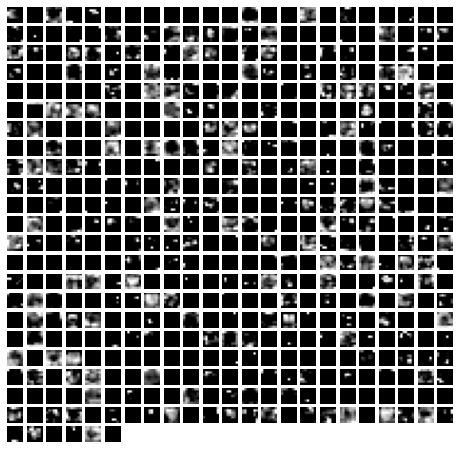

All layer images saved!


In [41]:
for i in range(19): 
  visual(model, X_test[1], i)
print("All layer images saved!")